In [1]:
import pandas as pd

Data_raw = pd.read_csv("../Data/TephraDataBase_raw.csv", encoding = 'latin1', low_memory=False)

In [2]:
def truncate(num, n):
    integer = int(num * (10**n))/(10**n)
    return float(integer)

In [3]:
import numpy as np
#Replace nan in columns by -1 to filter it
Data_raw['SiO2'] = Data_raw['SiO2'].replace(np.nan,-1)
Data_raw['FeO'] = Data_raw['FeO'].replace(np.nan,-1)
Data_raw['Fe2O3'] = Data_raw['Fe2O3'].replace(np.nan,-1)
Data_raw['FeOT'] = Data_raw['FeOT'].replace(np.nan,-1)
Data_raw['Fe2O3T'] = Data_raw['Fe2O3T'].replace(np.nan,-1)
Data_raw['Total'] = Data_raw['Total'].replace(np.nan,-1)
Data_raw['MnO_aux'] = Data_raw['MnO'].replace('-',-1); Data_raw['MnO_aux'] = Data_raw['MnO_aux'].astype(float)
Data_raw['P2O5_aux'] = Data_raw['P2O5'].replace('-',-1); Data_raw['P2O5_aux'] = Data_raw['P2O5_aux'].astype(float)

Data_raw_and_normalized = Data_raw.copy()
Data_raw_and_normalized['SiO2_normalized'] = np.nan
Data_raw_and_normalized['TiO2_normalized'] = np.nan
Data_raw_and_normalized['Al2O3_normalized'] = np.nan
Data_raw_and_normalized['FeO_normalized'] = np.nan
Data_raw_and_normalized['Fe2O3_normalized'] = np.nan
Data_raw_and_normalized['Fe2O3T_normalized'] = np.nan
Data_raw_and_normalized['FeOT_normalized'] = np.nan
Data_raw_and_normalized['MnO_normalized'] = np.nan
Data_raw_and_normalized['MgO_normalized'] = np.nan
Data_raw_and_normalized['CaO_normalized'] = np.nan
Data_raw_and_normalized['Na2O_normalized'] = np.nan
Data_raw_and_normalized['K2O_normalized'] = np.nan
Data_raw_and_normalized['P2O5_normalized'] = np.nan
Data_raw_and_normalized['Cl_normalized'] = np.nan
Data_raw_and_normalized['Total_normalization'] = np.nan

for i in range(0,len(Data_raw['SampleObservationID'])):
    #i = Data_raw[Data_raw['SampleObservationID'] == sample].index[0]
    
    if Data_raw['SiO2'][i] != -1:
        #print(Data_raw.loc[i,'SampleObservationID'])
        #print(i)
        if Data_raw['Total'][i]!= -1:
        
            #---------------- case 1: Fe is presented as FeOT in the original publication
            if (Data_raw['FeOT'][i] != -1)&(Data_raw['Fe2O3T'][i] == -1)&(Data_raw['FeO'][i] == -1)&(Data_raw['Fe2O3'][i] == -1):
                    
                sum_ = np.nansum([Data_raw['SiO2'][i],
                                  Data_raw['TiO2'][i],
                                  Data_raw['Al2O3'][i],
                                  Data_raw['FeOT'][i],
                                  Data_raw['MnO_aux'][i],
                                  Data_raw['MgO'][i],
                                  Data_raw['CaO'][i],
                                  Data_raw['Na2O'][i],
                                  Data_raw['K2O'][i],
                                  Data_raw['P2O5_aux'][i],
                                  Data_raw['Cl'][i]])
                
                Data_raw_and_normalized.loc[i,'SiO2_normalized'] = Data_raw['SiO2'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'TiO2_normalized'] = Data_raw['TiO2'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Al2O3_normalized'] = Data_raw['Al2O3'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'FeOT_normalized'] = Data_raw['FeOT'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'MnO_normalized'] = Data_raw['MnO_aux'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'MgO_normalized'] = Data_raw['MgO'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'CaO_normalized'] = Data_raw['CaO'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Na2O_normalized'] = Data_raw['Na2O'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'K2O_normalized'] = Data_raw['K2O'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'P2O5_normalized'] = Data_raw['P2O5_aux'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Cl_normalized'] = Data_raw['Cl'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Total_normalization'] = sum_
            
            #---------------- case 2: Fe is presented as Fe2O3T in the original publication    
            if (Data_raw['FeOT'][i] == -1)&(Data_raw['Fe2O3T'][i] != -1)&(Data_raw['FeO'][i] == -1)&(Data_raw['Fe2O3'][i] == -1):
                    
                sum_ = np.nansum([Data_raw['SiO2'][i],
                                  Data_raw['TiO2'][i],
                                  Data_raw['Al2O3'][i],
                                  Data_raw['Fe2O3T'][i]*0.899,
                                  Data_raw['MnO_aux'][i],
                                  Data_raw['MgO'][i],
                                  Data_raw['CaO'][i],
                                  Data_raw['Na2O'][i],
                                  Data_raw['K2O'][i],
                                  Data_raw['P2O5_aux'][i],
                                  Data_raw['Cl'][i]])
                
                Data_raw_and_normalized.loc[i,'SiO2_normalized'] = Data_raw['SiO2'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'TiO2_normalized'] = Data_raw['TiO2'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Al2O3_normalized'] = Data_raw['Al2O3'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Fe2O3T_normalized'] = Data_raw['Fe2O3T'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'MnO_normalized'] = Data_raw['MnO_aux'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'MgO_normalized'] = Data_raw['MgO'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'CaO_normalized'] = Data_raw['CaO'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Na2O_normalized'] = Data_raw['Na2O'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'K2O_normalized'] = Data_raw['K2O'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'P2O5_normalized'] = Data_raw['P2O5_aux'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Cl_normalized'] = Data_raw['Cl'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Total_normalization'] = sum_
                
            #---------------- case 3: Fe is presented as Fe2O3 and FeO in the original publication         
            if ((Data_raw['FeO'][i] != -1)&(Data_raw['Fe2O3'][i] != -1))&(Data_raw['FeOT'][i] == -1):
                    
                sum_ = np.nansum([Data_raw['SiO2'][i],
                                  Data_raw['TiO2'][i],
                                  Data_raw['Al2O3'][i],
                                  Data_raw['FeO'][i],
                                  0.899*Data_raw['Fe2O3'][i],
                                  Data_raw['MnO_aux'][i],
                                  Data_raw['MgO'][i],
                                  Data_raw['CaO'][i],
                                  Data_raw['Na2O'][i],
                                  Data_raw['K2O'][i],
                                  Data_raw['P2O5_aux'][i],
                                  Data_raw['Cl'][i]])
                
                Data_raw_and_normalized.loc[i,'SiO2_normalized'] = Data_raw['SiO2'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'TiO2_normalized'] = Data_raw['TiO2'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Al2O3_normalized'] = Data_raw['Al2O3'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'FeO_normalized'] = Data_raw['FeO'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Fe2O3_normalized'] = Data_raw['Fe2O3'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'MnO_normalized'] = Data_raw['MnO_aux'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'MgO_normalized'] = Data_raw['MgO'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'CaO_normalized'] = Data_raw['CaO'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Na2O_normalized'] = Data_raw['Na2O'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'K2O_normalized'] = Data_raw['K2O'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'P2O5_normalized'] = Data_raw['P2O5_aux'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Cl_normalized'] = Data_raw['Cl'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Total_normalization'] = sum_
 
            #---------------- case 4: Fe is presented as Fe2O3, FeO and additionally FeOT in the original publication 
            if ((Data_raw['FeO'][i] != -1)&(Data_raw['Fe2O3'][i] != -1))&(Data_raw['FeOT'][i] != -1):
                sum_ = np.nansum([Data_raw['SiO2'][i],
                                  Data_raw['TiO2'][i],
                                  Data_raw['Al2O3'][i],
                                  Data_raw['FeO'][i],
                                  0.899*Data_raw['Fe2O3'][i],
                                  Data_raw['MnO_aux'][i],
                                  Data_raw['MgO'][i],
                                  Data_raw['CaO'][i],
                                  Data_raw['Na2O'][i],
                                  Data_raw['K2O'][i],
                                  Data_raw['P2O5_aux'][i],
                                  Data_raw['Cl'][i]])
                
                Data_raw_and_normalized.loc[i,'SiO2_normalized'] = Data_raw['SiO2'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'TiO2_normalized'] = Data_raw['TiO2'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Al2O3_normalized'] = Data_raw['Al2O3'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'FeO_normalized'] = Data_raw['FeO'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Fe2O3_normalized'] = Data_raw['Fe2O3'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'FeOT_normalized'] = Data_raw['FeOT'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'MnO_normalized'] = Data_raw['MnO_aux'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'MgO_normalized'] = Data_raw['MgO'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'CaO_normalized'] = Data_raw['CaO'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Na2O_normalized'] = Data_raw['Na2O'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'K2O_normalized'] = Data_raw['K2O'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'P2O5_normalized'] = Data_raw['P2O5_aux'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Cl_normalized'] = Data_raw['Cl'][i]*100/sum_
                Data_raw_and_normalized.loc[i,'Total_normalization'] = sum_              
        
Data_raw_and_normalized = Data_raw_and_normalized.replace(-1,np.nan)

In [4]:
Data_raw_and_normalized.to_csv('../Data/TephraDataSet_raw_and_normalized.csv', index=False, encoding = 'latin1')
#Data_normalized.to_file('../Data/GeoTephraDataSet_normalized.shp')

<AxesSubplot:>

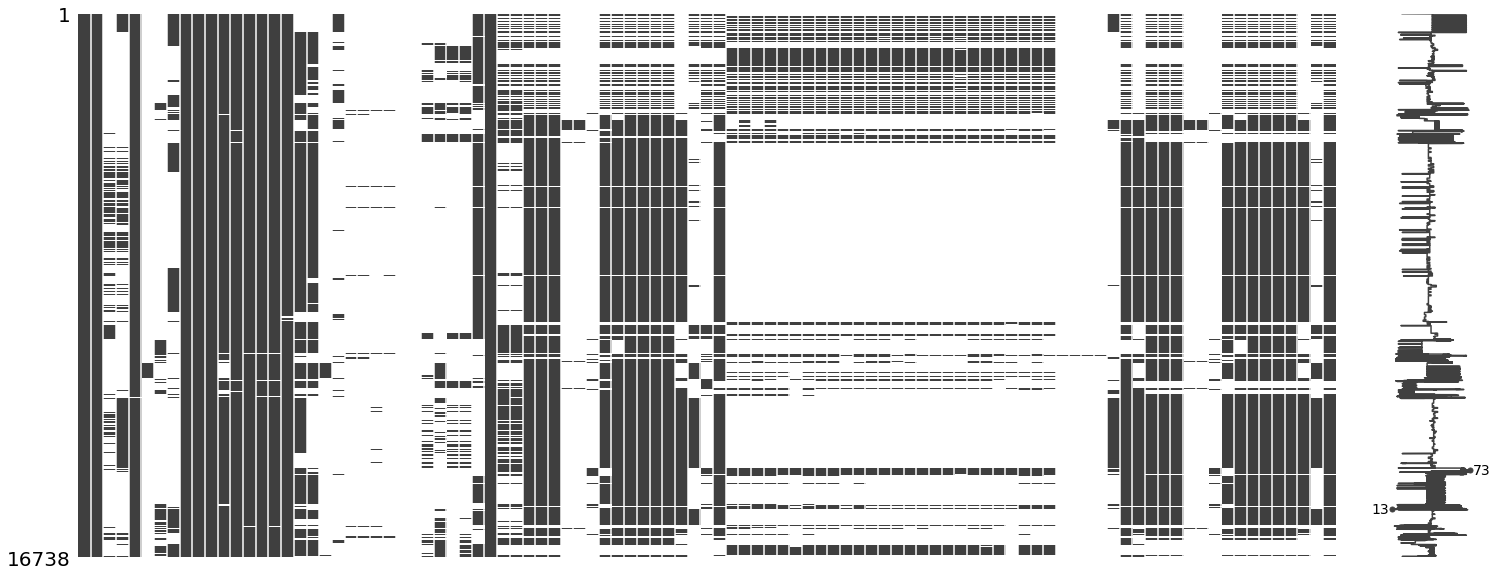

In [5]:
import missingno as msno
msno.matrix(Data_raw_and_normalized)